In [1]:
import kdezero
import kdezero.functions as F
from kdezero.models import MLP
import numpy as np

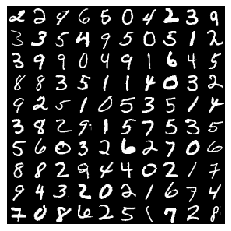

In [2]:
train_set = kdezero.datasets.MNIST(train=True)
train_set.show()

In [3]:
test_set = kdezero.datasets.MNIST(train=False)
print(len(train_set))
print(len(test_set))

60000
10000


In [4]:
batch_size = 100
train_loader = kdezero.DataLoader(train_set, batch_size)
test_loader = kdezero.DataLoader(test_set, batch_size, shuffle=False)

In [5]:
hidden_size = 1000

model = MLP((hidden_size, hidden_size, 10), activation=F.relu)
optimizer = kdezero.optimizers.Adam()
optimizer.add_hook(kdezero.optimizers.WeightDecay(1e-4))

In [6]:
model.compile(acc=F.accuracy, optimizer=optimizer)

In [7]:
model.fit_generator(train_loader, max_epoch=5, gpu=True)

set gpu
epoch: 1
train loss: 0.1925842486290882, accuracy: 0.9420666666666667
epoch: 2
train loss: 0.07862171950284391, accuracy: 0.9750333333333333
epoch: 3
train loss: 0.05693980216203878, accuracy: 0.98245
epoch: 4
train loss: 0.04854821558382052, accuracy: 0.9839833333333333
epoch: 5
train loss: 0.03820821286664189, accuracy: 0.9875666666666667


In [8]:
x, t = test_set[0]
x = np.array([x])
x = kdezero.cuda.as_cupy(x)
x.shape

(1, 784)

In [9]:
t = np.array([t])
t = kdezero.cuda.as_cupy(t)
t.shape

(1,)

In [10]:
y = model(x)
print(y)
pred = y.data.argmax(axis=1)
print(pred)
F.accuracy(y, t)

variable([[ -5.01583    -1.3072195  -1.3844296  -0.716638   -6.7418494  -4.6159825
           -10.8920965  11.723397   -4.6179724  -1.267992 ]])
[7]


variable(1.0)

In [11]:
model2 = MLP((hidden_size, hidden_size, 10), activation=F.relu)

In [12]:
model.evaluate(test_loader)

(0.06583379122326732, 0.9788)

In [13]:
test_loader.reset()
for x, t in test_loader:
    print(x.shape, t.shape)
    print(t[0])
    break

(100, 784) (100,)
7


In [14]:
train_loader.reset()
for x, t in train_loader:
    print(x.shape, t.shape)
    print(t)
    break

(100, 784) (100,)
[7 1 5 4 3 1 4 4 6 0 1 2 4 1 3 2 4 3 9 3 4 7 9 9 8 2 9 7 7 1 3 3 3 6 5 6 0
 8 3 6 3 7 3 1 8 1 6 0 0 9 8 3 7 7 0 1 6 0 3 5 3 5 7 4 4 9 9 1 7 3 0 6 2 4
 8 8 7 4 7 1 9 6 9 9 4 3 4 8 6 4 6 5 5 6 1 3 8 5 2 4]
